In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats

from ipywidgets import interact

from densityploter import DistributionPlotter


# Density Estimation

> What is Density Estimation?


Is a tecnique employed to estimate the probability density function (PDF) of a random variable based on observed data. 
Essentially, it involves constructing a function that represents the underlying distribution of the data.

> Why?


Because we are interested in recreating the population data from a sample of data. 



---
# Agenda

1) Create several random densities and merge them into one bizarre density
2) Use several tecniques to reproduce the grouped density

## 1) Create Objective Density

First here is an interactive graph for learning about the distribution parameters

Here you can play with 2 different distributions and see what would be their result combined.

In [2]:
plotter = DistributionPlotter(figsize=(20, 10))
plotter.display()


Output()

ok so now we know what to expect out of a combination of distributions lets make one out of 3 distributions

In [3]:
np.random.seed(42)
dist1 = np.random.normal(0,1,2000)
dist2 = np.random.beta(2,3,1000)
dist3 = np.random.gamma(3.6,1,2000)


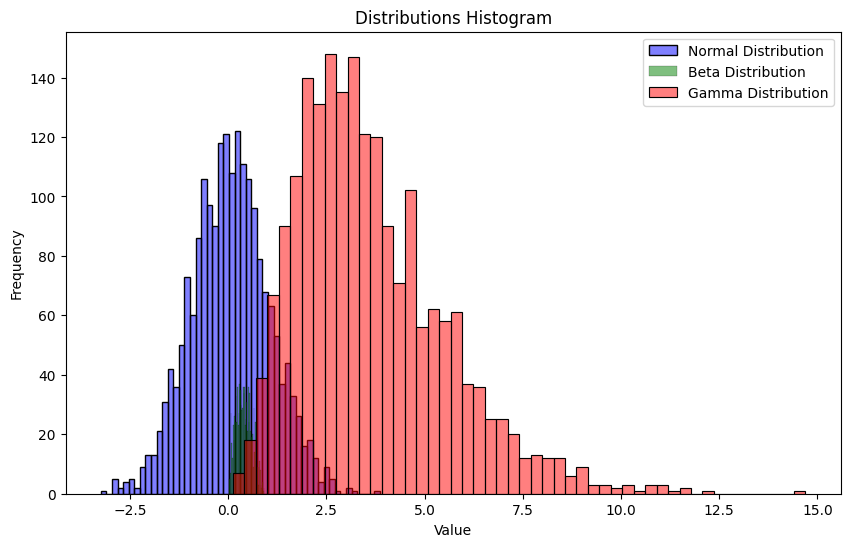

In [4]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each distribution with different colors
sns.histplot(dist1, bins=50, kde=False, color='blue', label='Normal Distribution', alpha=0.5)
sns.histplot(dist2, bins=50, kde=False, color='green', label='Beta Distribution', alpha=0.5)
sns.histplot(dist3, bins=50, kde=False, color='red', label='Gamma Distribution', alpha=0.5)

# Add titles and labels
plt.title('Distributions Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


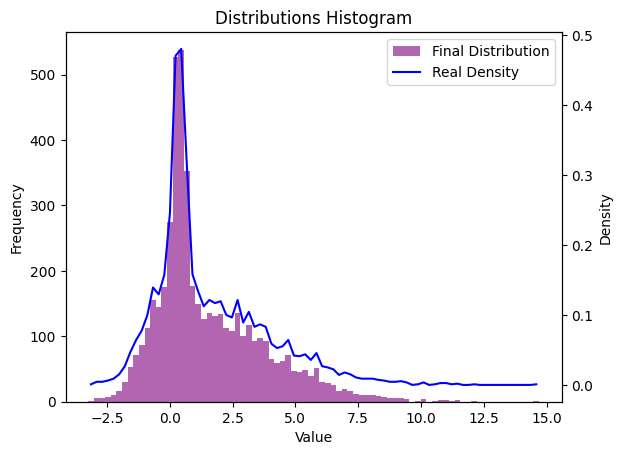

In [5]:
distf = np.concatenate([dist1, dist2, dist3])

# Create a histogram with bins=50
counts, bins, _ = plt.hist(distf, bins=80, color='purple', alpha=0.6, label='Final Distribution')

# Calculate the density manually
bin_width = bins[1] - bins[0]
density = counts / (sum(counts) * bin_width)


# Add titles and labels for the histogram
plt.title('Distributions Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Create a secondary y-axis for the density
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot the density on the secondary y-axis
ax2.plot(bins[:-1] + bin_width / 2, density, color='blue', label='Real Density')
ax2.set_ylabel('Density')

# Combine legends from both y-axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

# Show the plot
plt.show()


In [6]:
x = distf.reshape(-1, 1)
 

## Applying KDE

In [7]:
from sklearn.mixture import GaussianMixture as GMM

## Gaussian Mixture Model

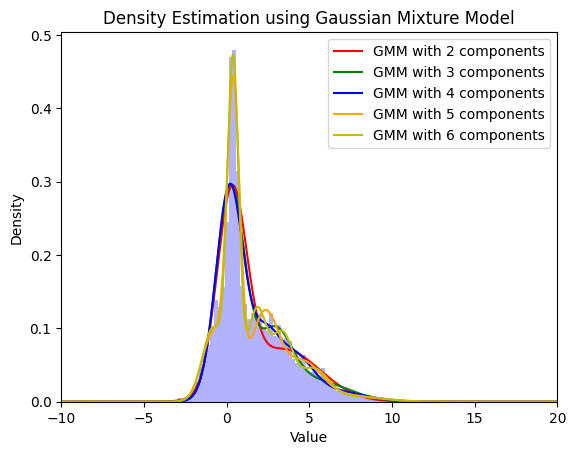

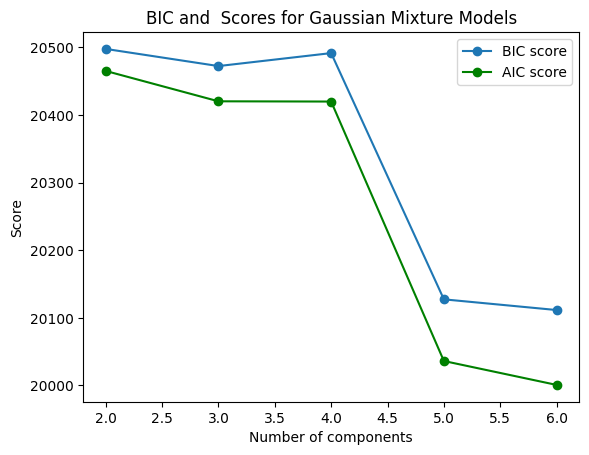

In [8]:
 

# Combine distributions
distf = np.concatenate([dist1, dist2, dist3])
distf_reshaped = distf.reshape(-1, 1)

# Fit GMM models with different numbers of components and calculate AIC
iters = 500 
models = [GMM(n_components=n, max_iter=iters, random_state=42).fit(distf_reshaped) for n in range(2, 7)]
bic_scores = [model.bic(distf_reshaped) for model in models]
aic_scores = [model.aic(distf_reshaped) for model in models]


# Compute the density using the fitted GMM models
xpdf = np.linspace(-10, 20, 1000).reshape(-1, 1)
densities = [np.exp(model.score_samples(xpdf)) for model in models]

# Plotting the results
plt.hist(distf, bins=80, density=True, alpha=0.3, color='blue')

colors = ['r', 'g', 'b', 'orange', 'y']
labels = [f'GMM with {n} components' for n in range(2, 7)]
for density, color, label in zip(densities, colors, labels):
    plt.plot(xpdf.flatten(), density, color=color, label=label)

plt.xlim(-10, 20)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Estimation using Gaussian Mixture Model')
plt.legend()
plt.show()




# Plot BIC scores
plt.plot(range(2, 7), bic_scores, marker='o', label= 'BIC score')

plt.plot(range(2, 7), aic_scores, marker='o', color='green', label= 'AIC score')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()
plt.title('BIC and  Scores for Gaussian Mixture Models')
plt.show()


## Gaussian Kernel Density Estimation

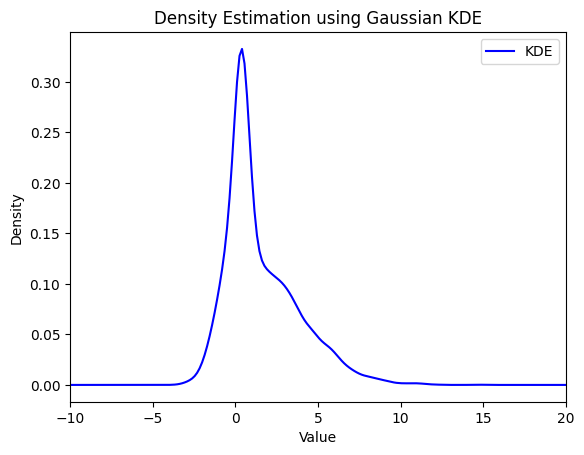

In [9]:
from scipy.stats import gaussian_kde

# Perform Kernel Density Estimation
kde = gaussian_kde(distf)
x = np.linspace(-10, 20, 200)
density = kde(x)

# Plot the density
plt.plot(x, density, color='blue', label='KDE')
plt.xlim(-10, 20)  
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Estimation using Gaussian KDE')
plt.legend()
plt.show()


## k-Nearest Neighbors (k-NN)

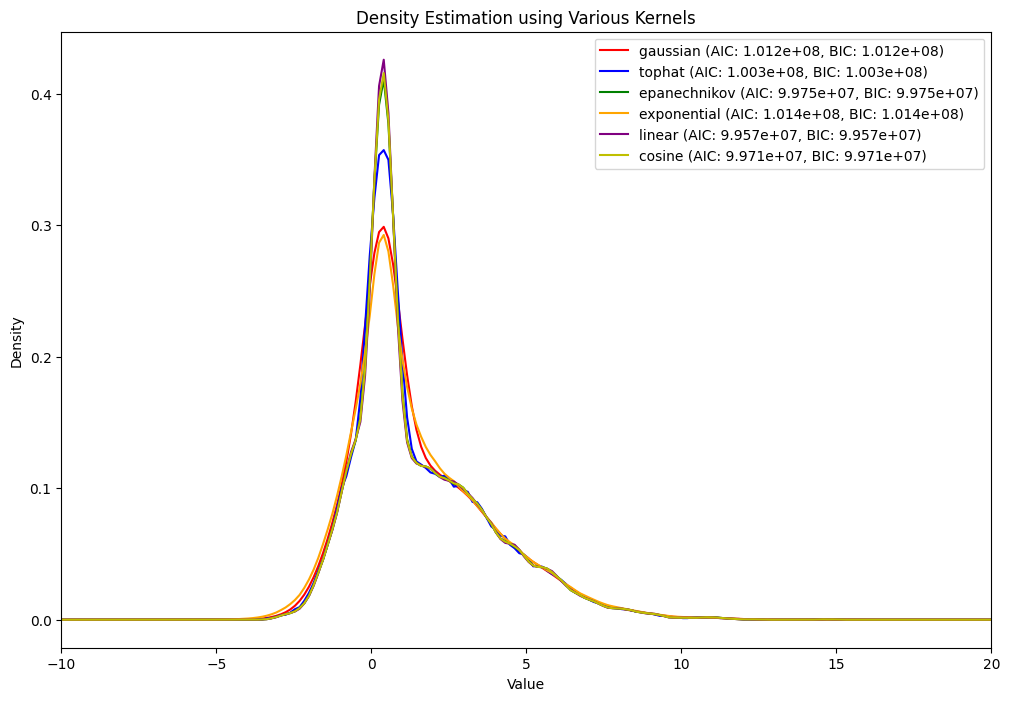

In [10]:
from sklearn.neighbors import KernelDensity
 
x = np.linspace(-10, 20, 200).reshape(-1, 1)
num_params =1

kernels = {
    "gaussian": 'r',
    "tophat": 'b',
    "epanechnikov": 'g',
    "exponential": 'orange',
    "linear": 'purple',
    "cosine": 'y'
}

plt.figure(figsize=(12, 8))

# Iterate over each kernel type
for kernel, color in kernels.items():
    # Fit the KernelDensity model
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(distf.reshape(-1, 1))
    
    # Calculate log density and density
    log_density = kde.score_samples(x)
    density = np.exp(log_density)
    
    # Calculate log likelihood
    log_likelihood = kde.score(distf.reshape(-1, 1)) * len(distf)  
    
    # Calculate AIC and BIC
    aic = 2 * num_params - 2 * log_likelihood
    bic = np.log(len(distf)) * num_params - 2 * log_likelihood

    # Plot the density
    plt.plot(x, density, color=color, label=f'{kernel} (AIC: {aic:.4g}, BIC: {bic:.4g})')

# Add plot labels and title
plt.xlim(-10, 20)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Estimation using Various Kernels')
plt.legend()
plt.show()

## Bayesian


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 941 seconds.
Sampling: [y]


Output()

array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

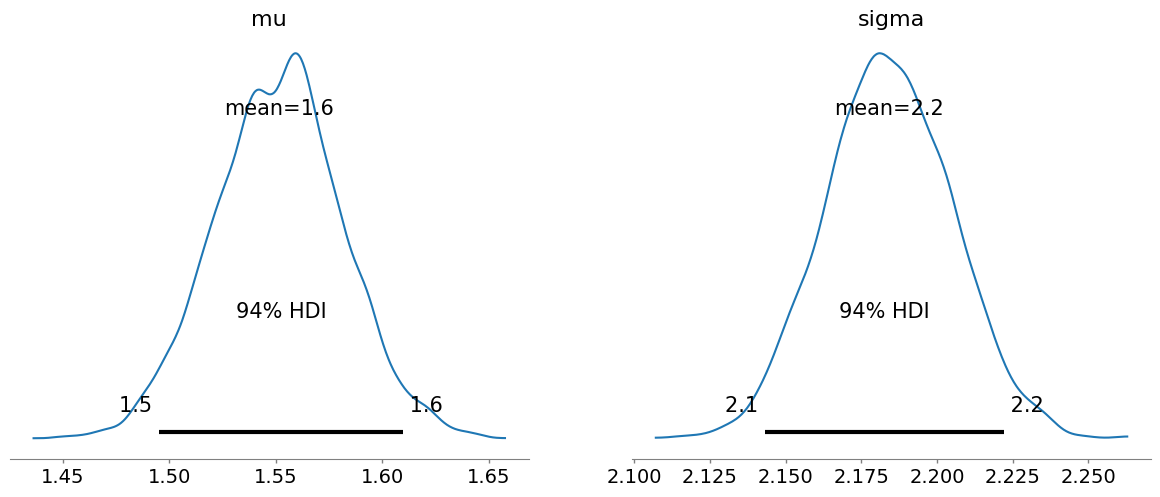

In [12]:
import pymc as pm
import arviz as az
import numpy as np

# Assuming distf is a concatenated array of dist1, dist2, and dist3
distf = np.concatenate([dist1, dist2, dist3])

# Define and fit the model
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sigma = pm.HalfNormal('sigma', sigma=1)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=distf)
    
    # Sample from the posterior
    trace = pm.sample(1000, return_inferencedata=True)
    
    # Compute the log likelihood
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

# Plot posterior distributions
az.plot_posterior(trace)

